# **Program 11**

Prepare a model for prediction of prostate cancer using KNN Classifier.

Confusion Matrix:
 [[18  4]
 [ 6  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78        22
           1       0.33      0.25      0.29         8

    accuracy                           0.67        30
   macro avg       0.54      0.53      0.53        30
weighted avg       0.64      0.67      0.65        30



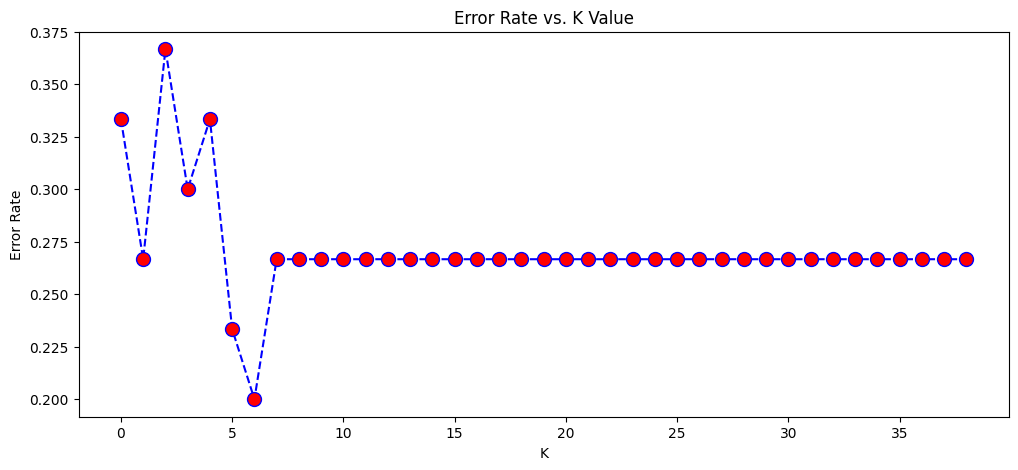

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('prostate.csv')

# Define feature matrix 'x' and target vector 'y'
x=df.drop('Target', axis = 1)
y=df['Target']

# Feature scaling using StandardScaler
scaler=StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(x),columns=x.columns[::-1])

# Split data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Initialize K-Nearest Neighbors classifier with 1 neighbor
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

# Make predictions on the test set
y_pred = knn_model.predict(x_test)

# Display the confusion matrix to evaluate model performance
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

# Display classification report with precision, recall, F1-score, and accuracy
print("Classification Report:\n", classification_report(y_test,y_pred))

# Elbow method for determining the optimal number of neighbors 'K'
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    new_y_pred = knn.predict(x_test)
    error_rate.append(np.mean(new_y_pred != y_test))

# Plot the error rate for different values of K
plt.figure(figsize=(12,5))
plt.plot(error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()